In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
df = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

In [16]:
print(df.head())
print(df.shape) # 5000 rows and 5 columns
print(df.columns) # all the columns that exist in the dataframe
print(df.info())

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  
(5000, 5)
Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ----

In [17]:
# number of students by year
print(f"Number of first year students: {len(df[df['Year'] == 'Year 1'])}")
print(f"Number of second year students: {len(df[df['Year'] == 'Year 2'])}")
print(f"Number of third year students: {len(df[df['Year'] == 'Year 3'])}")
print(f"Number of fourth year students: {len(df[df['Year'] == 'Year 4'])}")

Number of first year students: 5
Number of second year students: 2273
Number of third year students: 2719
Number of fourth year students: 3


University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: count, dtype: int64


Text(0, 0.5, 'University Name')

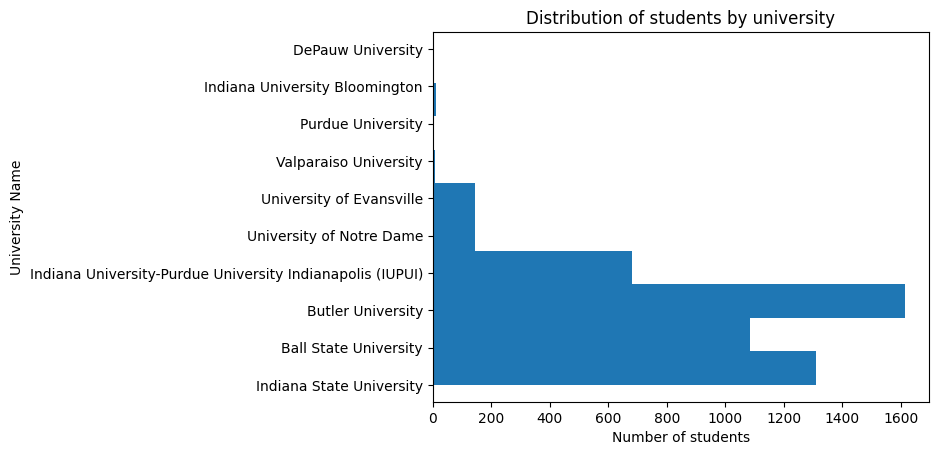

In [19]:
print(df["University"].value_counts())
plt.hist(df["University"], orientation='horizontal')
plt.title("Distribution of students by university")
plt.xlabel("Number of students")
plt.ylabel("University Name")

Since we are trying to predict what a student will order based on which year they're in, what major they're pursuing, and even what university they're attending, I chose to split the data with the X components including all the student information, and the Y component including the actual orders that the student got, since that's what the model is trying to predict. As far as the model selection goes, I used SKLearn's K-Nearest Neighbors model for several reasons, one of them being how the data is non-linear and how this problem involves multi-class classification, since there exist more than two labels that have to be taken into account for the prediction to be made.

In [20]:
X, y = df.loc[:, ["Year", "Major", "University"]], df.loc[:, ["Order"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3000, 3) (3000, 1)
(2000, 3) (2000, 1)


This is the part after loading in the dataset and splitting it into a training and testing set where the data is being processed in order to be fed into the model. Since the input data that will be utilized to make the order prediction is categorical in nature, they have to be encoded so that the model is able to interpret and work with them in an appropriate manner.

In [21]:
# label encoding the year, major, and university columns so that the model can process it
encoder = LabelEncoder()
X_train["Year"] = encoder.fit_transform(X_train["Year"])
X_train["Major"] = encoder.fit_transform(X_train["Major"])
X_train["University"] = encoder.fit_transform(X_train["University"])

X_test["Year"] = encoder.fit_transform(X_test["Year"])
X_test["Major"] = encoder.fit_transform(X_test["Major"])
X_test["University"] = encoder.fit_transform(X_test["University"])

param_grid_knn = {
    "p": [1,2,3,4],
}

for i in range(0, 4):
  p = param_grid_knn["p"][i]
  knn = KNeighborsClassifier(n_neighbors = 40, algorithm= "kd_tree", metric = 'minkowski', p = p, leaf_size=30).fit(X_train, y_train.values.ravel()) # flattens the numpy array to avoid the DataConversionWarning
  y_pred = knn.predict(X_test)
  print(f'Accuracy using p value of {p} : {round((accuracy_score(y_test, y_pred) * 100), 2)}%')


Accuracy using p value of 1 : 46.35%
Accuracy using p value of 2 : 45.7%
Accuracy using p value of 3 : 45.7%
Accuracy using p value of 4 : 45.7%


In [12]:
while True:
    user_choice = int(input("What would you like to do?: 1. Make a prediction 2. Exit"))
    if user_choice == 2:
        print("Thank you for using the application.")
        break
    else:
        valid_universities = ['Butler University', 'Indiana State University', 'Ball State University',                 'Indiana University-Purdue University Indianapolis (IUPUI)', 'University of Notre Dame',                       'University of Evansville', 'Indiana University Bloomington', 'Valparaiso University',                          'Purdue University', 'DePauw University']
        valid_majors = major_names = [
                                        'Chemistry',
                                        'Biology',
                                        'Astronomy',
                                        'Physics',
                                        'Mathematics',
                                        'Economics',
                                        'Business Administration',
                                        'Political Science',
                                        'Marketing',
                                        'Anthropology',
                                        'Finance',
                                        'Psychology',
                                        'Accounting',
                                        'Sociology',
                                        'International Business',
                                        'Music',
                                        'Mechanical Engineering',
                                        'Philosophy',
                                        'Fine Arts',
                                        'Civil Engineering'
                                    ]
        year = input("Enter which year of college you\'re in: ")
        major = input("Enter which major you are: ")
        university = input("Which university do you attend?: ")
        if year.lower() != "year 1" and year.lower() != "year 2" and year.lower() != "year 3" and year.lower() != "year 4":
            print("Invalid year. Please enter a valid year and try again")
        elif major not in valid_majors:
            print(f"Make sure the major you are pursuing is one of the following: {','.join(valid_majors)}")
        elif university not in valid_universities:
            print(f"Make sure the university you attend is one of the following: {','.join(valid_universities)}")
        else: # if year, major, and university are valid
            values = {"Year": year, "Major": major, "University": university}
            print(values)
            # not sure how to scale these values in order for them to be utilized to make a prediction

        
    

{'Year': 'Year 1', 'Major': 'Chemistry', 'University': 'Purdue University'}
Thank you for using the application.
